In [1]:
import torch

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/admission_predict.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(400, 9)

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
data = data.rename(index=str, columns={'Chance of Admit ': 'Admit_Probability'})

data = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
             'LOR ', 'CGPA', 'Research', 'Admit_Probability']]

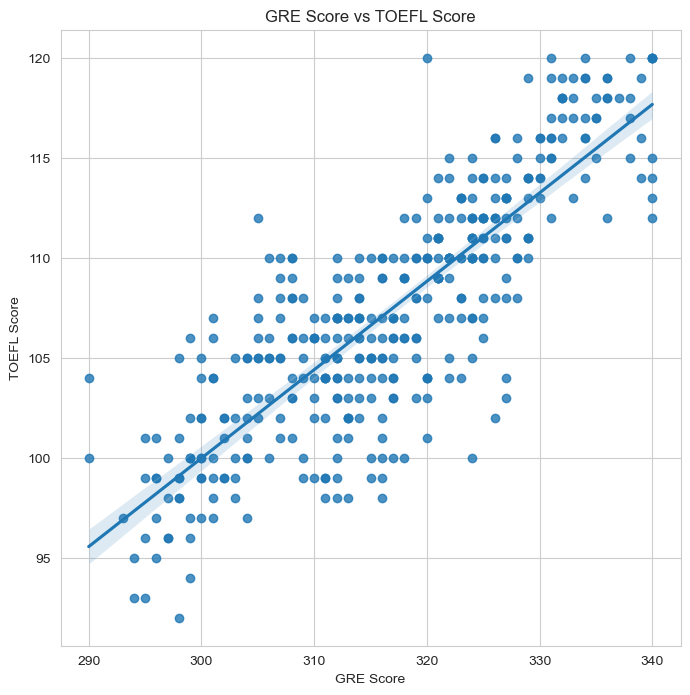

In [7]:
plt.figure(figsize=(8,8))
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=data)
plt.title("GRE Score vs TOEFL Score")
plt.show()

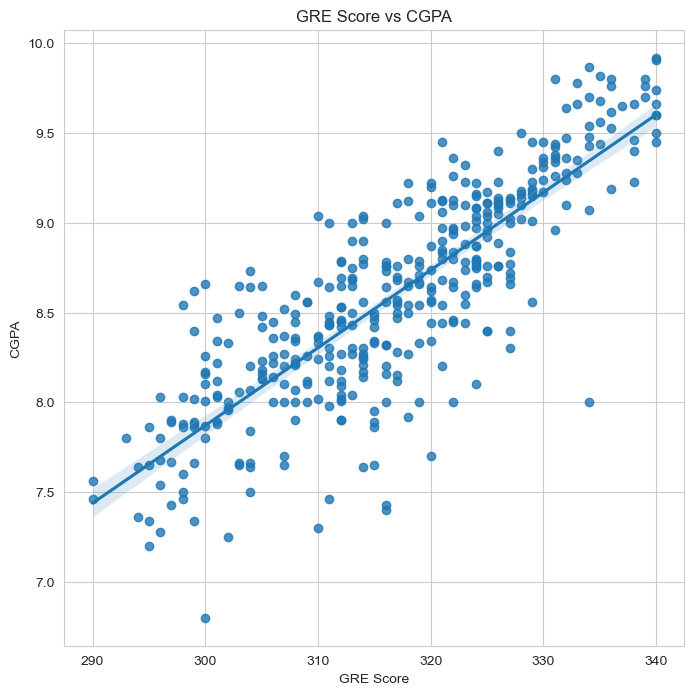

In [8]:
plt.figure(figsize=(8,8))
fig = sns.regplot(x="GRE Score", y="CGPA", data=data)
plt.title("GRE Score vs CGPA")
plt.show()

Text(0, 0.5, 'CGPA')

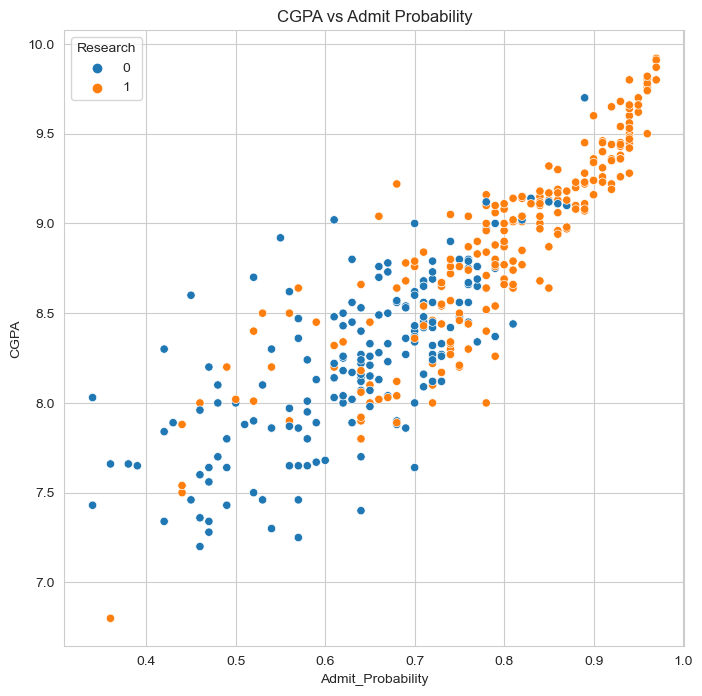

In [9]:
plt.figure(figsize=(8,8))

fig = sns.scatterplot(x = 'Admit_Probability', y='CGPA', data=data, hue='Research')

plt.title("CGPA vs Admit Probability")

plt.xlabel('Admit_Probability')
plt.ylabel('CGPA')

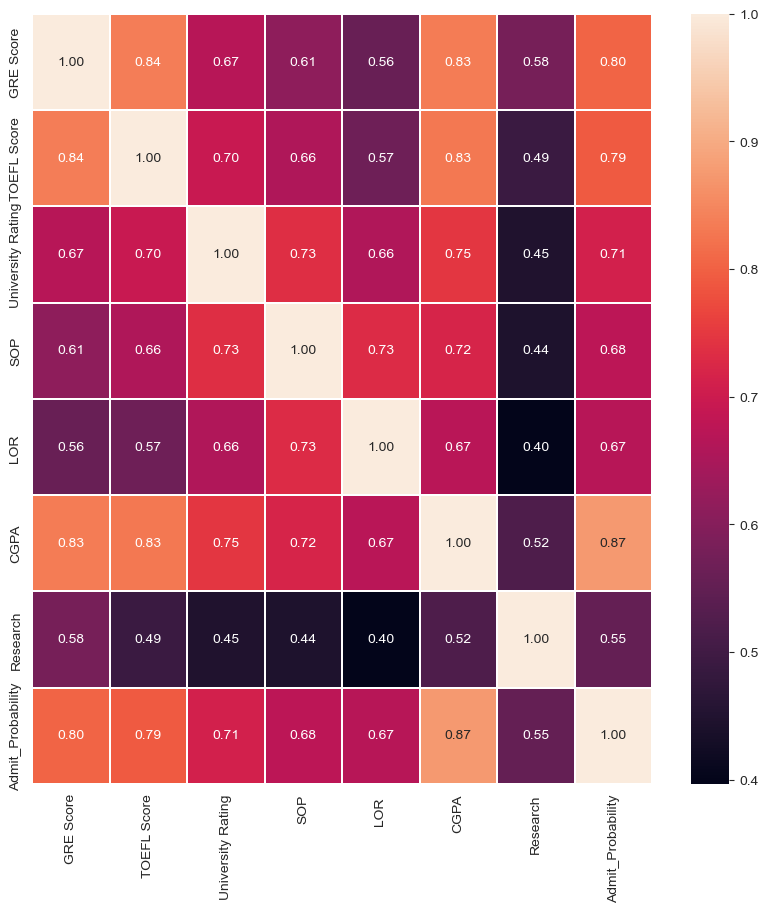

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt='.2f')
plt.show()

A correlation number close to 1 indicates that two variables are perfectly correlated,
a high value in one indicates a high value in another.
And a correlation number of close to -1 indicates that two variables are negatively correlated.

In [11]:
from sklearn import preprocessing

We've seen that our numeric features have different means, different standard deviations, and different ranges.
We are going to standardize the numeric data so that it has <b>zero mean and unit variance</b>.
Standardization can be performed using the <b>preprocessing.scale</b> function. This involves subtracting the mean of
every feature from all values of the feature and dividing by the standard deviation. This will scale all features to
have zero mean and unit variance.
<b>It has been found that neural networks perform better in training and prediction when they work with standardized
 features.</b>

In [12]:
data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']] = \
            preprocessing.scale(data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']])

In [13]:
data.sample(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
130,1.936637,1.087114,5,0.596653,1.167321,1.949515,1,0.96
340,-0.419528,-0.067635,3,-0.397769,-0.504260,-0.233263,1,0.75
365,1.151249,1.087114,4,1.093864,-0.504260,0.958869,1,0.86
42,-0.332263,-0.067635,2,-0.894980,-1.618648,-0.166101,1,0.53
55,0.278595,-0.727492,3,-0.397769,-0.504260,-1.509349,0,0.64
305,0.365860,0.262293,3,0.099442,0.052933,0.337617,1,0.74
123,-0.768590,0.097329,3,0.099442,0.052933,-0.636238,0,0.61
225,-1.815775,-1.387349,2,-0.894980,-1.061454,-0.955259,0,0.61
303,0.540391,-0.067635,3,0.099442,0.052933,-0.082148,1,0.73
264,0.714922,0.427257,2,-0.397769,-1.061454,0.270455,1,0.75


In [14]:
col = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']
features = data[col]

In [15]:
features.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,1.762107,1.746971,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029


In [16]:
target = data[['Admit_Probability']]

In [17]:
target.head()

,Admit_Probability
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [18]:
def map_func(x):
    if x >= 0.80:
        return int(2)
    elif x >= 0.60:
        return int(1)
    else:
        return int(0)
y = target.applymap(map_func)

In [19]:
target = y

In [20]:
target['Admit_Probability'].unique()

array([2, 1, 0], dtype=int64)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, x_test, Y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2)

In [23]:
Xtrain = torch.from_numpy(X_train.values).float()
Xtest = torch.from_numpy(x_test.values).float()

In [24]:
Xtrain.shape

torch.Size([320, 5])

In [25]:
Y_train.shape, y_test.shape

((320, 1), (80, 1))

In [26]:
Ytrain = torch.from_numpy(Y_train.values).squeeze()
Ytest = torch.from_numpy(y_test.values).squeeze()

In [27]:
Ytrain.shape, Ytrain.dtype

(torch.Size([320]), torch.int64)

In [28]:
import torch.nn as nn
import torch.nn.functional as F

In [29]:
input_size = Xtrain.shape[1]
output_size = len(target['Admit_Probability'].unique())

In [30]:
class Net(nn.Module):

    def __init__(self, hidden_size, activation_fn = 'relu', apply_dropout=False):
        """

        :param hidden_size: the number of neurons in the hidden linear layers
        :param activation_fn:
        :param apply_dropout:
        """
        super(Net, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

        self.hidden_size = hidden_size
        self.activation_fn = activation_fn

        self.dropout = nn.Dropout(0.2) if apply_dropout else None


    def forward(self, x):

        activation_fn = None
        match self.activation_fn:
            case 'sigmoid':
                activation_fn = F.sigmoid
            case 'tanh':
                activation_fn = F.tanh
            case 'relu':
                activation_fn = F.relu
            case _:
                raise Exception('invalid activation_fn ' + self.activation_fn)

        x = activation_fn(self.fc1(x))
        x = activation_fn(self.fc2(x))

        if self.dropout is not None:
            x = self.dropout(x)

        x = self.fc3(x)
        return F.log_softmax(x, dim=-1)

In [31]:
import torch.optim as optim

In [32]:
def train_and_evaluate_model(model, learn_rate=0.001):
    epoch_data = []
    epochs = 1000

    optimizer = optim.Adam(model.parameters(), lr=learn_rate)

    loss_fn = nn.NLLLoss()

    test_accuracy = 0.0

    for epoch in range(1, epochs + 1):
        optimizer.zero_grad()
        model.train()
        Ypred = model(Xtrain)
        loss = loss_fn(Ypred, Ytrain)
        loss.backward()
        optimizer.step()
        model.eval()
        Ypred_test = model(Xtest)
        loss_test = loss_fn(Ypred_test, Ytest)
        _, pred = Ypred_test.data.max(1)
        test_accuracy = pred.eq(Ytest.data).sum().item() / y_test.values.size
        epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), test_accuracy])
        if epoch % 100 == 0:
            print ('epohc - %d (%d%%) train loss - %.2f test loss - %.2f Test accuracy - %.4f'\
                   % (epoch, epoch/150*10, loss.data.item(),
                      loss_test.data.item(), test_accuracy))

    return {'model': model,
            'epoch_data': epoch_data,
            'num_epochs': epochs,
            'optimizer': optimizer,
            'loss_fn': loss_fn,
            'test_accuracy': test_accuracy,
            '_, pred': Ypred_test.data.max(1),
            'actual_test_label': Ytest
            }

In [33]:
net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=False)

net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
)

In [34]:
result_3_sigmoid = train_and_evaluate_model(net)

epohc - 100 (6%) train loss - 1.05 test loss - 1.06 Test accuracy - 0.4625
epohc - 200 (13%) train loss - 1.00 test loss - 1.05 Test accuracy - 0.4625
epohc - 300 (20%) train loss - 0.98 test loss - 1.04 Test accuracy - 0.4625
epohc - 400 (26%) train loss - 0.95 test loss - 1.03 Test accuracy - 0.4625
epohc - 500 (33%) train loss - 0.92 test loss - 0.99 Test accuracy - 0.5625
epohc - 600 (40%) train loss - 0.86 test loss - 0.94 Test accuracy - 0.7125
epohc - 700 (46%) train loss - 0.81 test loss - 0.88 Test accuracy - 0.7000
epohc - 800 (53%) train loss - 0.75 test loss - 0.82 Test accuracy - 0.7000
epohc - 900 (60%) train loss - 0.71 test loss - 0.78 Test accuracy - 0.7000
epohc - 1000 (66%) train loss - 0.68 test loss - 0.74 Test accuracy - 0.7000


In [35]:
net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=True)
net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [36]:
result_3_sigmoid = train_and_evaluate_model(net)

epohc - 100 (6%) train loss - 1.01 test loss - 1.07 Test accuracy - 0.4625
epohc - 200 (13%) train loss - 1.00 test loss - 1.06 Test accuracy - 0.4625
epohc - 300 (20%) train loss - 0.96 test loss - 1.03 Test accuracy - 0.4625
epohc - 400 (26%) train loss - 0.94 test loss - 0.97 Test accuracy - 0.5500
epohc - 500 (33%) train loss - 0.86 test loss - 0.91 Test accuracy - 0.7125
epohc - 600 (40%) train loss - 0.82 test loss - 0.84 Test accuracy - 0.7000
epohc - 700 (46%) train loss - 0.75 test loss - 0.79 Test accuracy - 0.7000
epohc - 800 (53%) train loss - 0.70 test loss - 0.75 Test accuracy - 0.7000
epohc - 900 (60%) train loss - 0.70 test loss - 0.72 Test accuracy - 0.7000
epohc - 1000 (66%) train loss - 0.73 test loss - 0.70 Test accuracy - 0.7000


In [37]:
net = Net(hidden_size=50, activation_fn='tanh')
net

Net(
  (fc1): Linear(in_features=5, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)

In [38]:
result_50_tanh = train_and_evaluate_model(net)

epohc - 100 (6%) train loss - 0.45 test loss - 0.42 Test accuracy - 0.8625
epohc - 200 (13%) train loss - 0.43 test loss - 0.41 Test accuracy - 0.8750
epohc - 300 (20%) train loss - 0.41 test loss - 0.40 Test accuracy - 0.8625
epohc - 400 (26%) train loss - 0.40 test loss - 0.39 Test accuracy - 0.8500
epohc - 500 (33%) train loss - 0.38 test loss - 0.38 Test accuracy - 0.8625
epohc - 600 (40%) train loss - 0.36 test loss - 0.38 Test accuracy - 0.8625
epohc - 700 (46%) train loss - 0.33 test loss - 0.38 Test accuracy - 0.8500
epohc - 800 (53%) train loss - 0.29 test loss - 0.38 Test accuracy - 0.8625
epohc - 900 (60%) train loss - 0.25 test loss - 0.39 Test accuracy - 0.8375
epohc - 1000 (66%) train loss - 0.20 test loss - 0.41 Test accuracy - 0.8375


In [39]:
net = Net(hidden_size=1000, activation_fn='tanh')
net

Net(
  (fc1): Linear(in_features=5, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=3, bias=True)
)

In [40]:
result_1000_tanh = train_and_evaluate_model(net)

epohc - 100 (6%) train loss - 0.36 test loss - 0.39 Test accuracy - 0.8750
epohc - 200 (13%) train loss - 0.15 test loss - 0.37 Test accuracy - 0.8875
epohc - 300 (20%) train loss - 0.04 test loss - 0.53 Test accuracy - 0.8750
epohc - 400 (26%) train loss - 0.01 test loss - 0.62 Test accuracy - 0.8750
epohc - 500 (33%) train loss - 0.01 test loss - 0.68 Test accuracy - 0.8750
epohc - 600 (40%) train loss - 0.00 test loss - 0.72 Test accuracy - 0.8625
epohc - 700 (46%) train loss - 0.00 test loss - 0.75 Test accuracy - 0.8625
epohc - 800 (53%) train loss - 0.00 test loss - 0.78 Test accuracy - 0.8500
epohc - 900 (60%) train loss - 0.00 test loss - 0.81 Test accuracy - 0.8500
epohc - 1000 (66%) train loss - 0.00 test loss - 0.83 Test accuracy - 0.8375


In [41]:
net = Net(hidden_size=1000, activation_fn='tanh', apply_dropout=True)
net

Net(
  (fc1): Linear(in_features=5, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [42]:
result_1000_tanh = train_and_evaluate_model(net)

epohc - 100 (6%) train loss - 0.37 test loss - 0.39 Test accuracy - 0.8750
epohc - 200 (13%) train loss - 0.19 test loss - 0.39 Test accuracy - 0.8875
epohc - 300 (20%) train loss - 0.09 test loss - 0.52 Test accuracy - 0.8750
epohc - 400 (26%) train loss - 0.04 test loss - 0.60 Test accuracy - 0.8625
epohc - 500 (33%) train loss - 0.02 test loss - 0.69 Test accuracy - 0.8375
epohc - 600 (40%) train loss - 0.01 test loss - 0.70 Test accuracy - 0.8250
epohc - 700 (46%) train loss - 0.01 test loss - 0.77 Test accuracy - 0.8375
epohc - 800 (53%) train loss - 0.01 test loss - 0.83 Test accuracy - 0.8375
epohc - 900 (60%) train loss - 0.01 test loss - 0.83 Test accuracy - 0.8375
epohc - 1000 (66%) train loss - 0.00 test loss - 0.87 Test accuracy - 0.8625


In [43]:
net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=False)

net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
)

In [44]:
result_100_sigmoid = train_and_evaluate_model(net)

epohc - 100 (6%) train loss - 1.13 test loss - 1.09 Test accuracy - 0.3250
epohc - 200 (13%) train loss - 1.05 test loss - 1.05 Test accuracy - 0.4625
epohc - 300 (20%) train loss - 1.00 test loss - 1.04 Test accuracy - 0.4625
epohc - 400 (26%) train loss - 0.97 test loss - 1.02 Test accuracy - 0.4625
epohc - 500 (33%) train loss - 0.93 test loss - 0.99 Test accuracy - 0.4625
epohc - 600 (40%) train loss - 0.88 test loss - 0.95 Test accuracy - 0.6625
epohc - 700 (46%) train loss - 0.83 test loss - 0.90 Test accuracy - 0.7000
epohc - 800 (53%) train loss - 0.78 test loss - 0.85 Test accuracy - 0.7000
epohc - 900 (60%) train loss - 0.74 test loss - 0.81 Test accuracy - 0.7000
epohc - 1000 (66%) train loss - 0.70 test loss - 0.77 Test accuracy - 0.7000


In [45]:
result_model = result_50_tanh

In [46]:
df_epochs_data = pd.DataFrame(result_model['epoch_data'],
                              columns=["epoch", "train_loss", "test_loss", "accuracy"])

In [47]:
import matplotlib.pyplot as plt

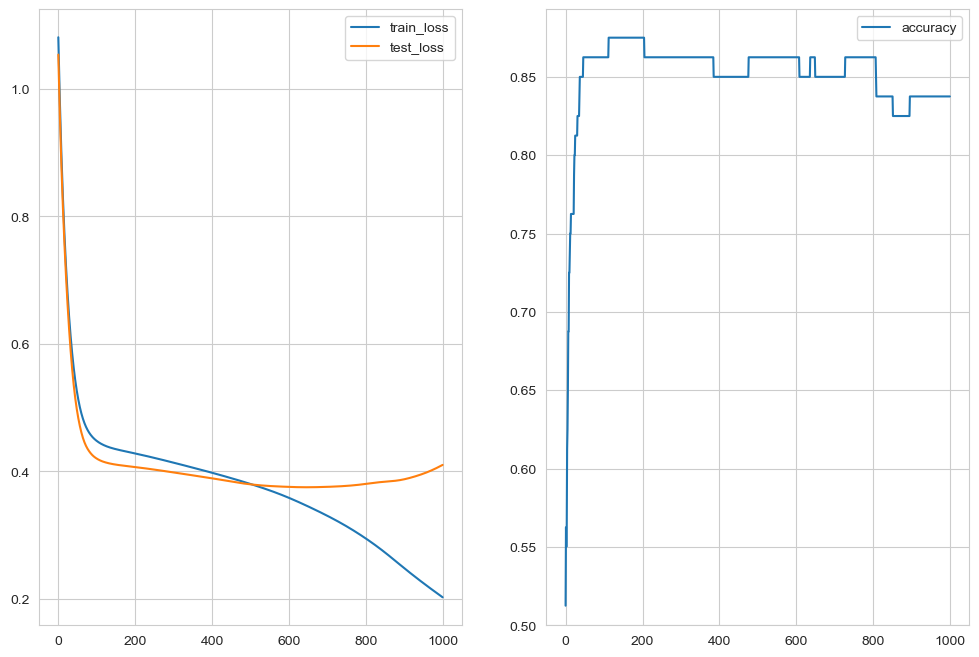

In [48]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

df_epochs_data[["train_loss", "test_loss"]].plot(ax=ax1)
df_epochs_data[["accuracy"]].plot(ax=ax2)

plt.ylim(bottom = 0.5)

plt.show()